In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from urllib.parse import urlparse

In [5]:
urls = pd.read_csv("shuffled.csv")

In [6]:
urls.head()

,Unnamed: 0,url,type
0,0,https://www.amaozom.6rcbybq.cn/,malign
1,1,https://www2.amaozom.kudayin.cn/,malign
2,2,https://wiadomosci.wp.pl/tag/pogoda,benign
3,3,https://www.aparatkids.com/?utm_source=aparat-...,benign
4,4,http://azb3s.cf/2jo4cehk1nzc1sk66897lrszwgwssp...,malign


In [7]:
urls.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
urls['length'] = urls['url'].str.len()

In [10]:
urls.head()

,url,type,length
0,https://www.amaozom.6rcbybq.cn/,malign,31.0
1,https://www2.amaozom.kudayin.cn/,malign,32.0
2,https://wiadomosci.wp.pl/tag/pogoda,benign,35.0
3,https://www.aparatkids.com/?utm_source=aparat-...,benign,121.0
4,http://azb3s.cf/2jo4cehk1nzc1sk66897lrszwgwssp...,malign,139.0


In [11]:
def ip_present(url):
    group = re.search(r'(\d{1,3}\.){3}\d(:\d{1,5})?',urlparse(url).netloc)
    if group:
        return 1
    else: 
        return 0

In [12]:
urls['ip_present'] = urls.apply(lambda urls:ip_present((str(urls.url))),axis=1)

In [13]:
urls[urls['ip_present']==1]

,url,type,length,ip_present
57,http://42.193.110.254/p/1/index.html?f34r34r43...,malign,87.0,1
227,http://2.136.95.251/sugarcrm/custom/blowfish/g...,malign,53.0,1
408,https://198.52.100.42/pc/login.php,malign,34.0,1
978,http://20.206.88.15/Cartoes/magalu%20copy/vali...,malign,54.0,1
1536,http://193.135.153.242/sunrise_mapplus/core/ss...,malign,57.0,1
...,...,...,...,...
20423,http://51.222.193.61/,malign,21.0,1
20464,http://157.240.22.35/?_fb_noscript=1,malign,36.0,1
21254,http://149.210.143.165/~admin/index3.html,malign,41.0,1
21421,http://227.8.79.34.bc.googleusercontent.com/Le...,malign,52.0,1


In [14]:
special_chars = ['.','@','?','&','|','=','_','~','%','/','*',':',',',';','$','%20',' ']
common_terms = ['http','https','www','.com']
phish_hints = ['wp','login','includes','admin','content','site','images','js','alibaba','css','myaccount','dropbox','themes','plugins','signin','view']

In [15]:
def special_char_count(url):
    count_char=0
    for char in special_chars:
        count_char += url.count(char)
    return count_char

In [16]:
urls['special_char_count'] = urls.apply(lambda urls:special_char_count(str(urls['url'])),axis=1)

In [17]:
urls.head()

,url,type,length,ip_present,special_char_count
0,https://www.amaozom.6rcbybq.cn/,malign,31.0,0,7
1,https://www2.amaozom.kudayin.cn/,malign,32.0,0,7
2,https://wiadomosci.wp.pl/tag/pogoda,benign,35.0,0,7
3,https://www.aparatkids.com/?utm_source=aparat-...,benign,121.0,0,18
4,http://azb3s.cf/2jo4cehk1nzc1sk66897lrszwgwssp...,malign,139.0,0,11


In [18]:
def common_term_count(url):
    count_char=0
    for term in common_terms:
        count_char += url.count(term)
    return count_char

In [19]:
urls['common_term_count'] = urls.apply(lambda urls:common_term_count(str(urls['url'])),axis=1)

In [20]:
urls.head()

,url,type,length,ip_present,special_char_count,common_term_count
0,https://www.amaozom.6rcbybq.cn/,malign,31.0,0,7,3
1,https://www2.amaozom.kudayin.cn/,malign,32.0,0,7,3
2,https://wiadomosci.wp.pl/tag/pogoda,benign,35.0,0,7,2
3,https://www.aparatkids.com/?utm_source=aparat-...,benign,121.0,0,18,4
4,http://azb3s.cf/2jo4cehk1nzc1sk66897lrszwgwssp...,malign,139.0,0,11,2


In [21]:
def digit_ratio(url):
    digit=0
    for i in url:
        if i.isdigit():
            digit+=1
    return digit/len(url)

In [22]:
urls['digit_ratio'] = urls.apply(lambda urls:digit_ratio(str(urls['url'])),axis=1)

In [23]:
urls.head()

,url,type,length,ip_present,special_char_count,common_term_count,digit_ratio
0,https://www.amaozom.6rcbybq.cn/,malign,31.0,0,7,3,0.032258
1,https://www2.amaozom.kudayin.cn/,malign,32.0,0,7,3,0.031250
2,https://wiadomosci.wp.pl/tag/pogoda,benign,35.0,0,7,2,0.000000
3,https://www.aparatkids.com/?utm_source=aparat-...,benign,121.0,0,18,4,0.000000
4,http://azb3s.cf/2jo4cehk1nzc1sk66897lrszwgwssp...,malign,139.0,0,11,2,0.201439


In [24]:
def phish_hint_count(url):
    count_hints=0
    for hints in phish_hints:
        count_hints += url.count(hints)
    return count_hints

In [25]:
urls['phish_hints'] = urls.apply(lambda urls:phish_hint_count(str(urls['url'])),axis=1)

In [26]:
urls.head()

,url,type,length,ip_present,special_char_count,common_term_count,digit_ratio,phish_hints
0,https://www.amaozom.6rcbybq.cn/,malign,31.0,0,7,3,0.032258,0
1,https://www2.amaozom.kudayin.cn/,malign,32.0,0,7,3,0.031250,0
2,https://wiadomosci.wp.pl/tag/pogoda,benign,35.0,0,7,2,0.000000,1
3,https://www.aparatkids.com/?utm_source=aparat-...,benign,121.0,0,18,4,0.000000,1
4,http://azb3s.cf/2jo4cehk1nzc1sk66897lrszwgwssp...,malign,139.0,0,11,2,0.201439,0


In [27]:
def second_double_slash(url):
    pos = url.rfind('//')
    if pos>6:
        if pos>7:
            return (1)
        else:
            return (0)
    else:
        return (0)

In [28]:
urls['second_double_slash'] = urls.apply(lambda urls:second_double_slash((str(urls.url))),axis=1)

In [29]:
urls[urls['second_double_slash']==1]

,url,type,length,ip_present,special_char_count,common_term_count,digit_ratio,phish_hints,second_double_slash
80,http://translate.sogoucdn.com/pcvtsnapshotorig...,malign,183.0,0,35,6,0.081967,0,1
140,https://verify.xexodus.com/u/account?issuerId=...,malign,171.0,0,22,5,0.128655,0,1
192,https://sportowefakty.wp.pl//pilka-nozna/rober...,benign,59.0,0,8,2,0.000000,1,1
194,https://sportowefakty.wp.pl//pilka-nozna/pko-e...,benign,56.0,0,8,2,0.000000,1,1
220,https://accounts.google.com/ServiceLogin?hl=en...,benign,101.0,0,20,6,0.000000,0,1
...,...,...,...,...,...,...,...,...,...
20879,http://www.gkjx168.com/images?http://us.battle...,malign,212.0,0,45,7,0.150943,3,1
20933,https://vk.com/away.php?to=https://sahara-dist...,malign,71.0,0,14,6,0.000000,2,1
21192,http://adityaschooljabalpur.com/hun73rc0nf/1//...,malign,78.0,0,13,2,0.051282,0,1
21378,https://accounts.google.com/ServiceLogin?servi...,malign,266.0,0,38,11,0.026316,0,1


In [30]:
def http_present(url):
    if re.findall(r'https?',urlparse(url).netloc):
        return 1
    else: return 0

In [31]:
urls['http(s)_present'] = urls.apply(lambda urls:http_present((str(urls.url))),axis=1)

In [33]:
def depth_URL(url):
    path_lst = urlparse(url).path.split('/')
    depth = 0
    for i in path_lst:
        if len(i)!=0:
            depth+=1
    return depth

In [34]:
urls['URL_depth'] = urls.apply(lambda urls:depth_URL((str(urls.url))),axis=1)

In [35]:
urls.head()

,url,type,length,ip_present,special_char_count,common_term_count,digit_ratio,phish_hints,second_double_slash,http(s)_present,URL_depth
0,https://www.amaozom.6rcbybq.cn/,malign,31.0,0,7,3,0.032258,0,0,0,0
1,https://www2.amaozom.kudayin.cn/,malign,32.0,0,7,3,0.031250,0,0,0,0
2,https://wiadomosci.wp.pl/tag/pogoda,benign,35.0,0,7,2,0.000000,1,0,0,2
3,https://www.aparatkids.com/?utm_source=aparat-...,benign,121.0,0,18,4,0.000000,1,0,0,0
4,http://azb3s.cf/2jo4cehk1nzc1sk66897lrszwgwssp...,malign,139.0,0,11,2,0.201439,0,0,0,2


In [36]:
def abnormal_subdomain(url):
    domain = urlparse(url).netloc
    url = domain.split('.')[0]
    if re.match(r'^(?=.*\d)(?=.*[A-Za-z])[A-Za-z0-9]{1,10}$',url):
        return 1
    else:return 0
    

In [37]:
urls['abnormal_subdomain'] = urls.apply(lambda urls:abnormal_subdomain((str(urls.url))),axis=1)

In [38]:
urls.head()

,url,type,length,ip_present,special_char_count,common_term_count,digit_ratio,phish_hints,second_double_slash,http(s)_present,URL_depth,abnormal_subdomain
0,https://www.amaozom.6rcbybq.cn/,malign,31.0,0,7,3,0.032258,0,0,0,0,0
1,https://www2.amaozom.kudayin.cn/,malign,32.0,0,7,3,0.031250,0,0,0,0,1
2,https://wiadomosci.wp.pl/tag/pogoda,benign,35.0,0,7,2,0.000000,1,0,0,2,0
3,https://www.aparatkids.com/?utm_source=aparat-...,benign,121.0,0,18,4,0.000000,1,0,0,0,0
4,http://azb3s.cf/2jo4cehk1nzc1sk66897lrszwgwssp...,malign,139.0,0,11,2,0.201439,0,0,0,2,1


In [39]:
urls.columns

Index(['url', 'type', 'length', 'ip_present', 'special_char_count',
       'common_term_count', 'digit_ratio', 'phish_hints',
       'second_double_slash', 'http(s)_present', 'URL_depth',
       'abnormal_subdomain'],
      dtype='object')

In [40]:
urls['type'] = urls['type'].replace(['malign','benign'],[1,0])

In [41]:
urls.corr()

,type,length,ip_present,special_char_count,common_term_count,digit_ratio,phish_hints,second_double_slash,http(s)_present,URL_depth,abnormal_subdomain
type,1.000000,0.011766,0.065560,-0.053202,-0.405477,0.034282,0.240884,0.059348,0.041263,-0.059102,0.165455
length,0.011766,1.000000,-0.008894,0.341101,0.078259,0.166548,0.073097,0.047894,0.003808,0.124069,0.061458
ip_present,0.065560,-0.008894,1.000000,0.003441,-0.089383,0.135414,0.026247,0.002288,-0.001849,0.002104,-0.010362
special_char_count,-0.053202,0.341101,0.003441,1.000000,0.264892,0.258797,0.209152,0.193625,-0.002977,0.253652,-0.026235
common_term_count,-0.405477,0.078259,-0.089383,0.264892,1.000000,-0.042717,-0.019794,0.278862,0.012958,0.085105,-0.120440
digit_ratio,0.034282,0.166548,0.135414,0.258797,-0.042717,1.000000,-0.002047,0.002144,0.032977,0.251427,0.093846
phish_hints,0.240884,0.073097,0.026247,0.209152,-0.019794,-0.002047,1.000000,0.054583,0.027362,0.255114,-0.001014
second_double_slash,0.059348,0.047894,0.002288,0.193625,0.278862,0.002144,0.054583,1.000000,-0.003663,-0.025846,-0.006265
http(s)_present,0.041263,0.003808,-0.001849,-0.002977,0.012958,0.032977,0.027362,-0.003663,1.000000,-0.025626,-0.006522
URL_depth,-0.059102,0.124069,0.002104,0.253652,0.085105,0.251427,0.255114,-0.025846,-0.025626,1.000000,0.007921


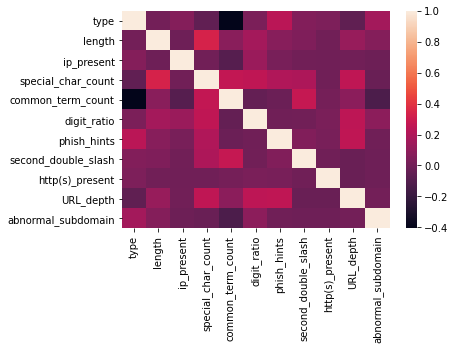

In [42]:
sns.heatmap(urls.corr())

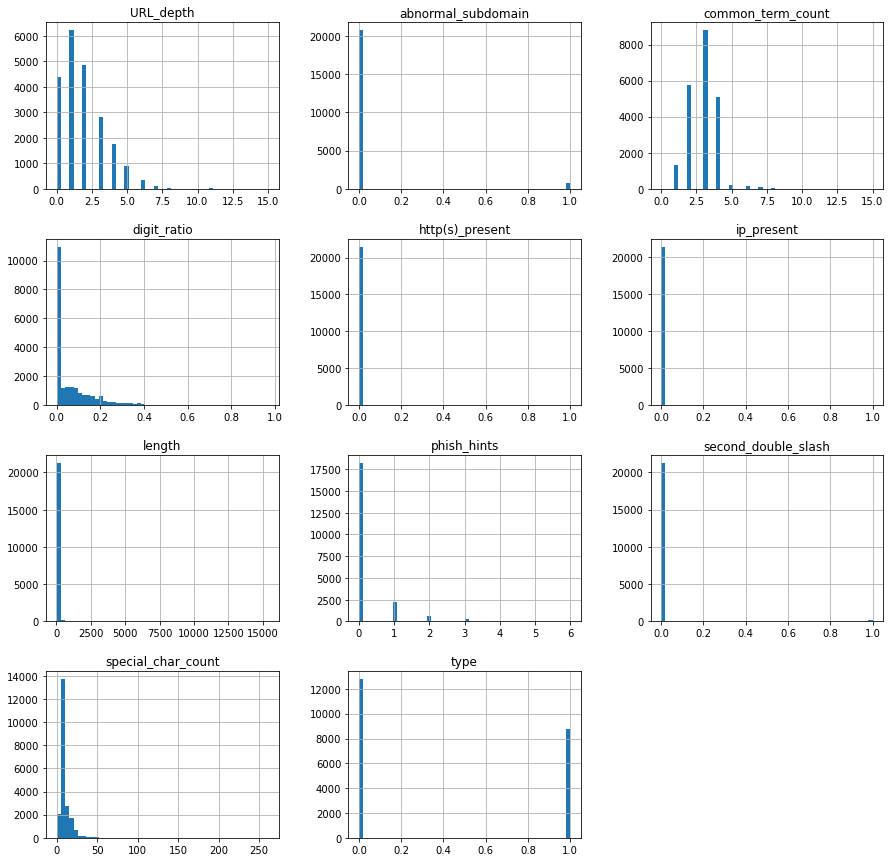

In [43]:
urls.hist(bins=50,figsize=(15,15))
plt.show()

In [48]:
urls.to_csv("final_processed_csv.csv")